In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np 

In [2]:
(X_train,Y_train ) , (X_test,Y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
print(X_train.shape)
print(X_train[1].shape)

(60000, 28, 28)
(28, 28)


In [6]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

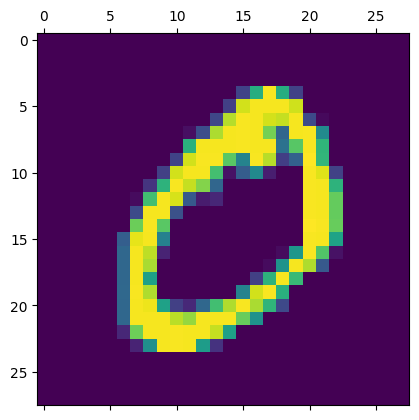

In [7]:
plt.matshow(X_train[1])

In [8]:
Y_train[1]

0

In [9]:

X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:

X_train_flattened.shape

(60000, 784)

In [13]:

X_train_flattened[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [15]:
#here 10 is the output nurons and then input_shape 
with tf.device('/GPU:0'):
    model = keras.Sequential([
        keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 1ms/step - loss: 0.4711 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3042 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2830 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2728 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9257


In [16]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2712 - accuracy: 0.9240


[0.2712348401546478, 0.9240000247955322]

In [17]:
y_predicted=model.predict(X_test_flattened)
y_predicted[6]

313/313 [==============================] - 0s 734us/step


array([7.4449991e-04, 7.4131283e-05, 2.3906380e-04, 5.5272497e-02,
       9.9662387e-01, 5.0706756e-01, 1.1188187e-02, 1.8291056e-01,
       7.2639722e-01, 7.7765167e-01], dtype=float32)

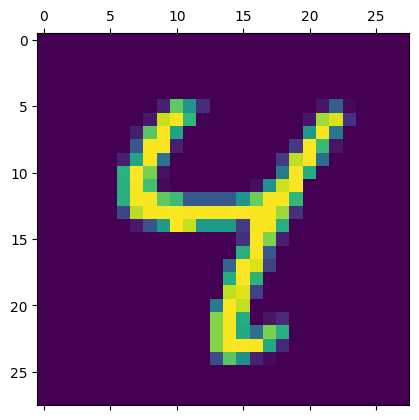

In [18]:

plt.matshow(X_test[6])

In [19]:
np.argmax(y_predicted[6])

4

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [21]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [22]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    2,    0,    4,    2,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [  10,    9,  918,   25,    8,    1,   12,    9,   36,    4],
       [   4,    0,   18,  931,    0,   18,    2,   10,   18,    9],
       [   2,    1,    4,    2,  914,    0,    9,    4,   10,   36],
       [  12,    3,    5,   38,   11,  771,   14,    5,   27,    6],
       [  17,    3,    8,    2,    8,   12,  904,    2,    2,    0],
       [   1,   10,   24,    9,   10,    1,    0,  940,    1,   32],
       [  12,   12,    6,   26,    9,   26,    9,   11,  855,    8],
       [  11,    8,    1,   11,   28,    8,    0,   16,    5,  921]])>

Text(95.72222222222221, 0.5, 'Truth')

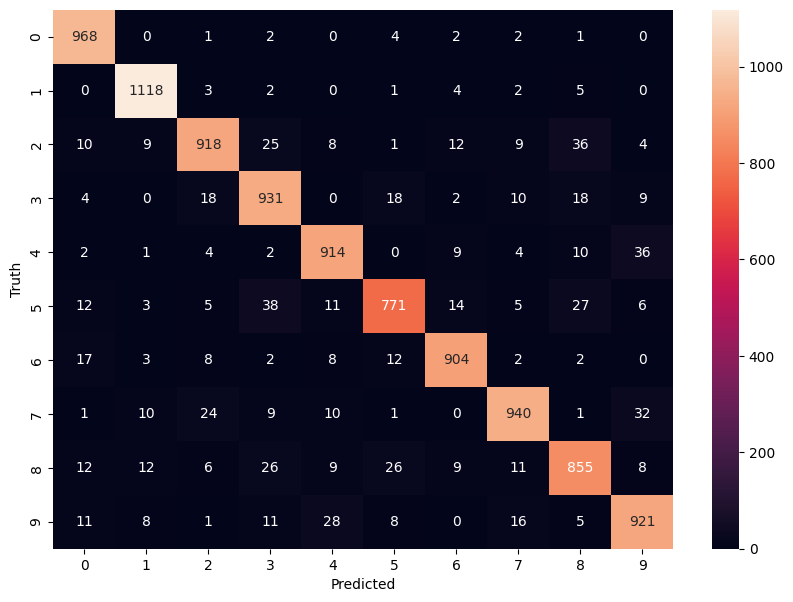

In [24]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
#using hidden layer 
#in this 100 means number of nurons in the hidden layer it is trial and error|
with tf.device('/CPU:0'):
    model= keras.Sequential([
        keras.layers.Dense(100,input_shape=(784,),activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
    
    model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 657us/step - loss: 0.2678 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 1s 663us/step - loss: 0.1220 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 1s 662us/step - loss: 0.0837 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 1s 662us/step - loss: 0.0634 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 1s 666us/step - loss: 0.0495 - accuracy: 0.9853


In [28]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0745 - accuracy: 0.9779


[0.07453683018684387, 0.9779000282287598]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

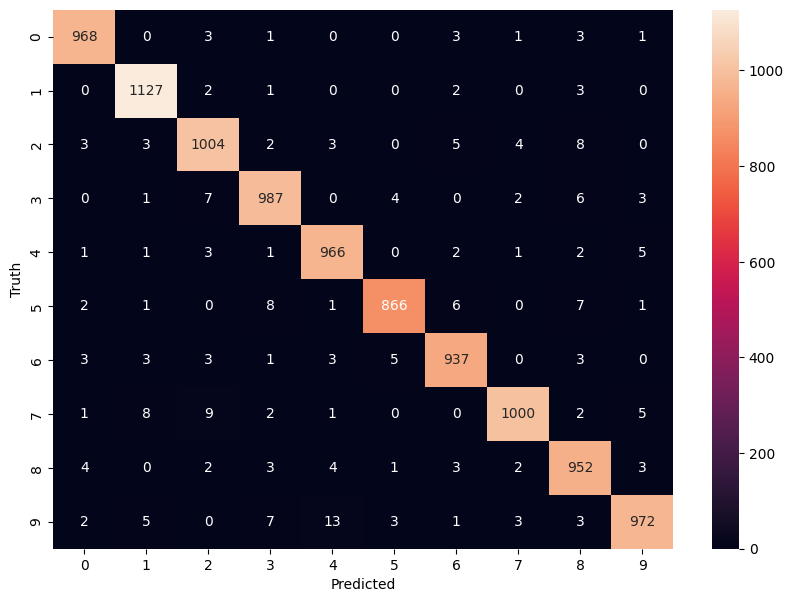

In [29]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
#here we will use latten layer so that we dont have to call .reshape on input dataset 

with tf.device('/GPU:0'):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2794 - accuracy: 0.9205
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1261 - accuracy: 0.9624
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0863 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0652 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0506 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0415 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0335 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0268 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0225 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.019

In [32]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0850 - accuracy: 0.9771


[0.08500216901302338, 0.9771000146865845]

In [33]:
model.save("./saved_model/")

INFO:tensorflow:Assets written to: ./saved_model/assets



(1) Post training quantization
Without quantization

In [34]:
converter =tf.lite.TFLiteConverter.from_saved_model("./saved_model/")
tflite_model=converter.convert()

In [35]:
converter =tf.lite.TFLiteConverter.from_saved_model("./saved_model/")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model=converter.convert()

In [36]:

len(tflite_model)

320052

In [37]:
len(tflite_quant_model)

84928

In [38]:
with open("tflite_model.tflite", "wb") as f:
    f.write(tflite_model)

In [39]:
with open("tflite_quant_model.tflite", "wb") as f:
    f.write(tflite_quant_model)


**(2) Quantization aware training**

In [41]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
q_aware_model = quantize_model(model)

# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

q_aware_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLay  (None, 28, 28)           3         
 er)                                                             
                                                                 
 quant_flatten_1 (QuantizeWr  (None, 784)              1         
 apperV2)                                                        
                                                                 
 quant_dense_9 (QuantizeWrap  (None, 100)              78505     
 perV2)                                                          
                                                                 
 quant_dense_10 (QuantizeWra  (None, 10)               1015      
 pperV2)                                                         
                                                                 
Total params: 79,524
Trainable params: 79,510
Non-trai

In [43]:
q_aware_model.fit(X_train, Y_train, epochs=1)


1875/1875 [==============================] - 5s 2ms/step - loss: 0.0181 - accuracy: 0.9944


In [44]:

q_aware_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0887 - accuracy: 0.9762


[0.08873598277568817, 0.9761999845504761]

In [45]:
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_qaware_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\aksha\AppData\Local\Temp\tmpmptkuyei\assets


INFO:tensorflow:Assets written to: C:\Users\aksha\AppData\Local\Temp\tmpmptkuyei\assets
D:\Installation_path\ANACONDA\envs\GPU\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [46]:
len(tflite_qaware_model)

82784

In [47]:
with open("tflite_qaware_model.tflite", 'wb') as f:
    f.write(tflite_qaware_model)